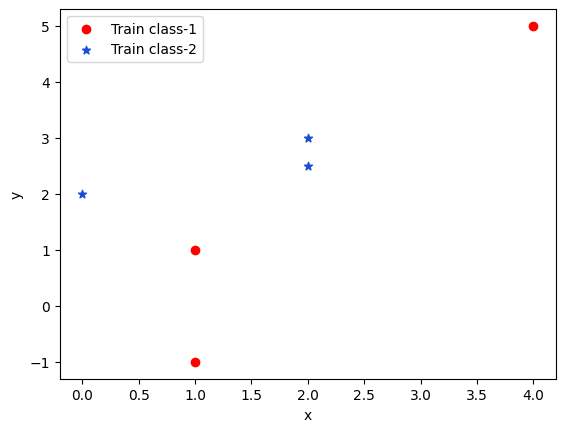

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Plotting training data
x,y,z = np.loadtxt('sample_data/train-perceptron.txt',unpack=True, delimiter=' ')
plt.xlabel('x')
plt.ylabel('y')
for m in range(len(z)):
    #print(m + 1, days[m])
    if z[m]==1:
        xc1=plt.scatter(x[m], y[m], color='r')
    elif z[m]==2:
        xc2=plt.scatter(x[m], y[m], marker='*', color='#184DD5')

plt.legend([xc1, xc2], ["Train class-1", "Train class-2"])
plt.show()

In [11]:
import numpy as np
xcl1=[]
ycl1=[]
xcl2=[]
ycl2=[]

for m in range(len(z)):
    if z[m]==1:
        xcl1.extend([x[m]])
        ycl1.extend([y[m]])
    elif z[m]==2:
        xcl2.extend([x[m]])
        ycl2.extend([y[m]])
print(xcl1,ycl1)
print(xcl2,ycl2)

[1.0, 1.0, 4.0] [1.0, -1.0, 5.0]
[2.0, 0.0, 2.0] [2.5, 2.0, 3.0]


In [12]:
import numpy as np

yd = np.zeros((len(y),6))
print(yd,  yd.shape, yd.ndim)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] (6, 6) 2


In [13]:
for i in range(len(ycl1)):
    yd[i][0]=np.power(xcl1[i],2)
    yd[i][1]=np.power(ycl1[i],2)
    yd[i][2]=xcl1[i]*ycl1[i]
    yd[i][3]=xcl1[i]
    yd[i][4]=ycl1[i]
    yd[i][5]=1


for i in range(len(ycl2)):
    yd[len(xcl1)+i][0]=-(np.power(xcl2[i],2))
    yd[len(xcl1)+i][1]=-(np.power(ycl2[i],2))
    yd[len(xcl1)+i][2]=-(xcl2[i]*ycl2[i])
    yd[len(xcl1)+i][3]=-xcl2[i]
    yd[len(xcl1)+i][4]=-ycl2[i]
    yd[len(xcl1)+i][5]=-1

print(yd)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [14]:
weight = [[0]*6 for i in range(3)]

weight[0]=np.ones(6)
weight[1]=np.zeros(6)
np.random.seed(10)
weight[2] = np.random.random((6))

weight=np.array(weight)
print(weight)

[[1.         1.         1.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665]]


[[  0.1   6.  102. ]
 [  0.2  92.  104. ]
 [  0.3 104.   91. ]
 [  0.4 106.  116. ]
 [  0.5  93.  105. ]
 [  0.6  93.  114. ]
 [  0.7 108.   91. ]
 [  0.8 115.   91. ]
 [  0.9  94.  105. ]
 [  1.   94.   93. ]]


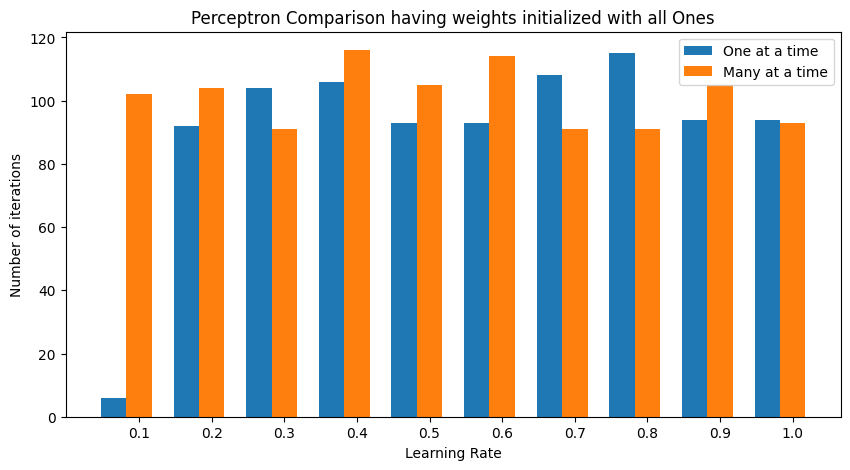

[[  0.1  94.  105. ]
 [  0.2  94.  105. ]
 [  0.3  94.  105. ]
 [  0.4  94.  105. ]
 [  0.5  94.   92. ]
 [  0.6  94.  105. ]
 [  0.7  94.   92. ]
 [  0.8  94.  105. ]
 [  0.9  94.  105. ]
 [  1.   94.   92. ]]


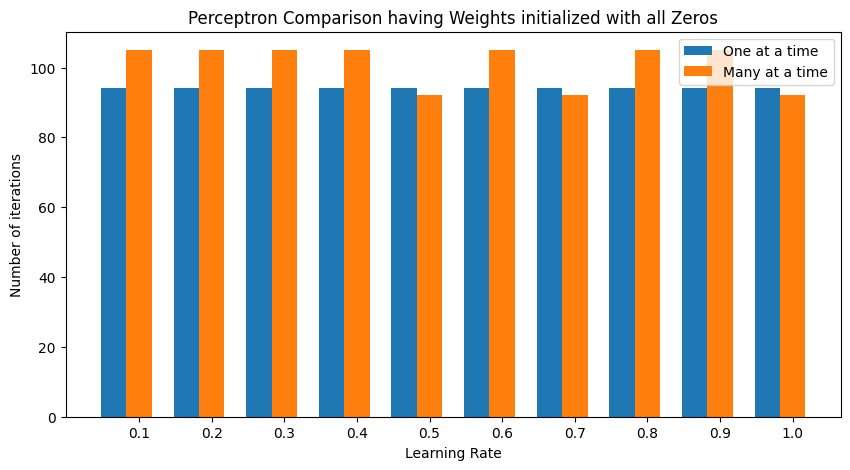

[[  0.1  97.   84. ]
 [  0.2  95.   91. ]
 [  0.3  93.  117. ]
 [  0.4 101.  133. ]
 [  0.5 106.   90. ]
 [  0.6 113.  105. ]
 [  0.7  94.   88. ]
 [  0.8 113.  138. ]
 [  0.9 108.  138. ]
 [  1.  101.  150. ]]


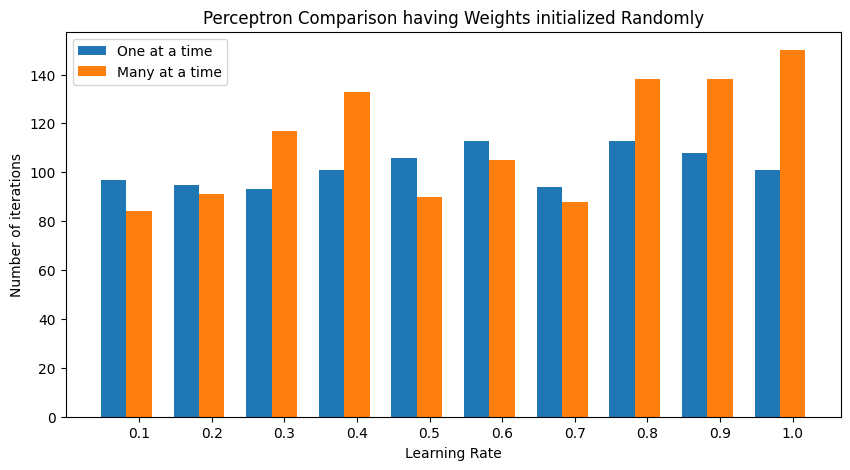

In [15]:
for k in range(3):
    cnt=0
    table = np.zeros(shape=(10,3))
    for alpha in np.arange(1,11,1)/10:
        table[cnt][0]=alpha
        w = weight[k]
        iteration=0


        for j in range(500):
            size=0
            for i in range(len(z)):
                g=np.dot(yd[i,:],w.T)
                if g<=0:
                    w=w+alpha*yd[i,:]
                    #print(w)
                else:
                    size=size+1
            if(size==len(z)):
                iteration=j+1
                break
        table[cnt][1]=iteration

        w = weight[k]
        iteration=0
        wtemp=0


        for j in range(500):
            size=0
            wtemp=0
            for i in range(len(z)):
                g=np.dot(yd[i,:],w.T)
                if g<=0:
                    wtemp=wtemp+yd[i,:]
                else:
                    size=size+1
            if(size==len(z)):
                iteration=j+1
                break
            w=w+alpha*wtemp
        table[cnt][2]=iteration
        cnt=cnt+1

    print(np.array_str(table, suppress_small=True))

    f, ax = plt.subplots()
    f.set_figheight(5)
    f.set_figwidth(10)
    index = np.arange(10)
    bar_width = 0.35

    if k==0:
        plt.title('Perceptron Comparison having weights initialized with all Ones')
    elif k==1:
        plt.title('Perceptron Comparison having Weights initialized with all Zeros')
    else:
        plt.title('Perceptron Comparison having Weights initialized Randomly')

    plt.bar(index, table[:,1], bar_width,label='One at a time')
    plt.bar(index + bar_width, table[:,2], bar_width, label='Many at a time')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of iterations')
    plt.xticks(index + bar_width, table[:,0])
    plt.legend()
    plt.show()